In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('out/sim2_users.csv')

In [3]:
#df = df.iloc[0:1000,]
df

,user_id,persona_id,cohort_id
0,0,48,5791
1,1,56,28780
2,2,80,13934
3,3,47,1284
4,4,7,27109
...,...,...,...
999995,999995,56,15539
999996,999996,49,16966
999997,999997,47,1837
999998,999998,5,29484


In [4]:
df.iloc[0:20,]

,user_id,persona_id,cohort_id
0,0,48,5791
1,1,56,28780
2,2,80,13934
3,3,47,1284
4,4,7,27109
5,5,62,21602
6,6,2,26743
7,7,55,28728
8,8,48,15019
9,9,49,229


In [5]:
res = df.groupby(['cohort_id'])['user_id'].apply(list).reset_index()
res = res.sort_values('cohort_id')
res

,cohort_id,user_id
0,0,"[32814, 35983, 72940, 104907, 170112, 300192, ..."
1,1,"[535522, 601368, 656319, 875441, 985289]"
2,2,"[13657, 14821, 61202, 72639, 230018, 263846, 3..."
3,3,"[22028, 132096, 198241, 299993, 310851, 344895..."
4,4,"[12452, 21094, 79287, 94166, 108477, 197505, 3..."
...,...,...
33487,33867,"[28611, 33751, 186289, 210845, 272296, 288345,..."
33488,33868,"[13909, 59581, 62982, 230710, 328917, 332016, ..."
33489,33869,"[18461, 18528, 133772, 178918, 195041, 201513,..."
33490,33870,"[93100, 411849, 445229, 605518, 624200, 706642..."


In [6]:
vc = df.cohort_id.value_counts()
len(vc[vc>1])
len(vc[vc==1])
len(vc)
#list(vc)

33492

In [7]:
# Calculates the number of personas with more than 1 user
def get_persona_counts(user_ids):
    
    _tmp = df[df['user_id'].isin(user_ids)]
    vc = _tmp['persona_id'].value_counts()
    return list(vc)

# Calculates the number of personas with more than 1 user
def get_personas(user_ids):
    return list(df[df['user_id'].isin(user_ids)]['persona_id'])

def get_num_user_shared_persona(uniq_personas_count):
    if len(uniq_personas_count) == 1:
        return sum(uniq_personas_count)
    return sum([x for x in uniq_personas_count if x>1])
    
    


res['num_users'] = res['user_id'].apply(len)
res['personas'] = res['user_id'].apply(get_personas)
res['uniq_personas'] = res['personas'].apply(lambda x: list(set(x)))
res['uniq_personas_count'] = res['user_id'].apply(get_persona_counts)
res['num_uniq_personas'] = res['uniq_personas'].apply(len)
res['num_users_shared_persona'] = res['uniq_personas_count'].apply(get_num_user_shared_persona)
res['per_users_shared_persona'] = res['num_users_shared_persona'] / res['num_users']

#res['personas_gt_1'] = res['user_id'].apply(f)
res

,cohort_id,user_id,num_users,personas,uniq_personas,uniq_personas_count,num_uniq_personas,num_users_shared_persona,per_users_shared_persona
0,0,"[32814, 35983, 72940, 104907, 170112, 300192, ...",29,"[98, 94, 15, 24, 72, 24, 72, 24, 88, 25, 89, 8...","[89, 32, 98, 72, 73, 15, 80, 20, 85, 24, 25, 8...","[7, 4, 3, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1]",15,20,0.689655
1,1,"[535522, 601368, 656319, 875441, 985289]",5,"[48, 88, 54, 79, 47]","[47, 48, 79, 54, 88]","[1, 1, 1, 1, 1]",5,0,0.000000
2,2,"[13657, 14821, 61202, 72639, 230018, 263846, 3...",24,"[88, 24, 50, 87, 98, 25, 79, 28, 9, 49, 25, 47...","[89, 98, 9, 76, 79, 47, 49, 50, 15, 94, 20, 53...","[5, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",17,10,0.416667
3,3,"[22028, 132096, 198241, 299993, 310851, 344895...",13,"[8, 40, 72, 25, 81, 72, 24, 71, 29, 15, 3, 81,...","[3, 71, 8, 40, 72, 45, 15, 81, 24, 25, 29]","[2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1]",11,4,0.307692
4,4,"[12452, 21094, 79287, 94166, 108477, 197505, 3...",19,"[20, 23, 45, 88, 24, 24, 49, 24, 88, 6, 50, 83...","[6, 72, 45, 47, 49, 50, 83, 20, 81, 23, 88, 24]","[4, 4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1]",12,10,0.526316
...,...,...,...,...,...,...,...,...,...
33487,33867,"[28611, 33751, 186289, 210845, 272296, 288345,...",23,"[52, 68, 48, 65, 59, 74, 64, 65, 1, 55, 99, 59...","[64, 65, 1, 99, 68, 4, 9, 74, 45, 14, 78, 48, ...","[2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",20,6,0.260870
33488,33868,"[13909, 59581, 62982, 230710, 328917, 332016, ...",14,"[74, 11, 0, 77, 86, 23, 96, 46, 7, 14, 82, 10,...","[0, 96, 7, 39, 74, 11, 10, 77, 46, 14, 82, 55,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",14,0,0.000000
33489,33869,"[18461, 18528, 133772, 178918, 195041, 201513,...",40,"[33, 59, 55, 64, 59, 11, 81, 4, 74, 51, 4, 33,...","[0, 1, 4, 8, 11, 18, 23, 26, 27, 33, 41, 46, 4...","[4, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, ...",26,25,0.625000
33490,33870,"[93100, 411849, 445229, 605518, 624200, 706642...",7,"[23, 33, 14, 69, 78, 28, 78]","[33, 69, 78, 14, 23, 28]","[2, 1, 1, 1, 1, 1]",6,2,0.285714


In [18]:
res.to_csv('out/sim2_cohorts.csv', index=False)

In [8]:
res['num_users'].describe()

count    33492.000000
mean        29.857877
std         48.086017
min          1.000000
25%          8.000000
50%         17.000000
75%         34.000000
max       1981.000000
Name: num_users, dtype: float64

In [9]:
res['num_uniq_personas'].describe()

count    33492.000000
mean        13.998447
std         11.064751
min          1.000000
25%          6.000000
50%         11.000000
75%         19.000000
max         83.000000
Name: num_uniq_personas, dtype: float64

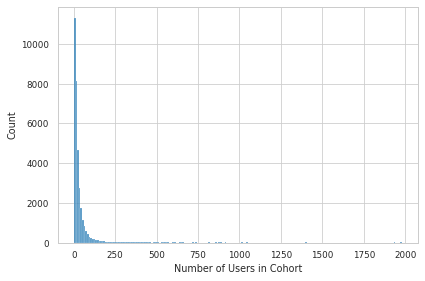

In [10]:
sns.set_context("paper")
sns.set_style("whitegrid")

ax = sns.histplot(x="num_users", data=res, bins=200)
ax.set(xlabel="Number of Users in Cohort")
#ax.set(ylabel="Probality of Same Cohort ID")
#ax.legend(title='Starting domains')
plt.tight_layout()

In [11]:
res2 = res[res.num_users > 10]

In [12]:
res2['num_users'].describe()

count    22184.000000
mean        42.190813
std         55.105498
min         11.000000
25%         17.000000
50%         26.000000
75%         46.000000
max       1981.000000
Name: num_users, dtype: float64

In [13]:
res2.sort_values('per_users_shared_persona', ascending=True)

,cohort_id,user_id,num_users,personas,uniq_personas,uniq_personas_count,num_uniq_personas,num_users_shared_persona,per_users_shared_persona
24199,24497,"[67162, 88275, 245208, 257772, 451428, 584340,...",11,"[79, 29, 16, 44, 66, 26, 84, 70, 87, 42, 13]","[66, 70, 42, 44, 13, 79, 16, 84, 87, 26, 29]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",11,0,0.000000
28264,28593,"[117371, 144156, 320284, 358120, 459626, 52832...",11,"[17, 84, 56, 28, 83, 92, 31, 40, 16, 74, 64]","[64, 40, 74, 92, 16, 17, 83, 84, 56, 28, 31]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",11,0,0.000000
12537,12675,"[83197, 118360, 182844, 211965, 661509, 743355...",13,"[26, 88, 92, 56, 5, 29, 52, 84, 28, 46, 17, 18...","[56, 5, 28, 46, 17, 18, 82, 52, 84, 88, 26, 92...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",13,0,0.000000
16345,16520,"[22630, 92878, 202298, 242481, 343588, 398520,...",13,"[66, 41, 48, 4, 53, 90, 62, 46, 81, 68, 14, 72...","[66, 4, 68, 72, 41, 13, 46, 14, 48, 81, 53, 90...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",13,0,0.000000
1382,1399,"[94081, 130277, 188359, 204604, 211936, 435366...",12,"[47, 46, 0, 19, 95, 71, 91, 14, 81, 37, 89, 11]","[0, 37, 71, 11, 46, 47, 14, 81, 19, 89, 91, 95]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",12,0,0.000000
...,...,...,...,...,...,...,...,...,...
5613,5692,"[424, 849, 1352, 2289, 3262, 3554, 3922, 4719,...",1981,"[77, 34, 21, 58, 34, 43, 9, 58, 34, 34, 58, 34...","[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[861, 571, 70, 38, 32, 28, 26, 24, 21, 17, 16,...",79,1963,0.990914
6008,6091,"[28294, 98557, 168749, 188218, 205342, 434454,...",11,"[66, 8, 67, 8, 66, 5, 67, 8, 67, 5, 66]","[8, 66, 67, 5]","[3, 3, 3, 2]",4,11,1.000000
3298,3348,"[18402, 69746, 124868, 285935, 363236, 367651,...",15,"[75, 15, 98, 98, 15, 15, 15, 15, 15, 15, 75, 1...","[73, 98, 75, 15]","[9, 2, 2, 2]",4,15,1.000000
20327,20582,"[3791, 76608, 109738, 127467, 136670, 150238, ...",24,"[62, 27, 67, 27, 27, 67, 62, 62, 27, 67, 67, 6...","[67, 27, 62]","[11, 7, 6]",3,24,1.000000


In [14]:
res2['num_users'].describe()

count    22184.000000
mean        42.190813
std         55.105498
min         11.000000
25%         17.000000
50%         26.000000
75%         46.000000
max       1981.000000
Name: num_users, dtype: float64

In [15]:
res2['num_uniq_personas'].describe()

count    22184.000000
mean        18.718491
std         10.783851
min          2.000000
25%         11.000000
50%         16.000000
75%         23.000000
max         83.000000
Name: num_uniq_personas, dtype: float64

In [16]:
res2['per_users_shared_persona'].describe()

count    22184.000000
mean         0.603665
std          0.191455
min          0.000000
25%          0.476190
50%          0.625000
75%          0.750000
max          1.000000
Name: per_users_shared_persona, dtype: float64

In [50]:
sum(res2['per_users_shared_persona'] <= 0)
sum(res2['per_users_shared_persona'] <= 0)/res2.shape[0]

0.007167327803822575

In [48]:
n = res2.shape[0]
for i in np.linspace(0.0, 1.0, num=11, dtype=float):
    num = sum(res2['per_users_shared_persona']> i)
    per = 100*(num / n)
    print("{:5.1f}% (or more) users shared a persona in {:5d} / {} = {:.2f}% of cohorts".format(100*i, num, n, per))
    #print("In in {:5d} / {} = {:.2f}% of cohorts, {:5.1f}% users shared a persona".format(num, n, per, 100*i))


  0.0% (or more) users shared a persona in 22025 / 22184 = 99.28% of cohorts
 10.0% (or more) users shared a persona in 22018 / 22184 = 99.25% of cohorts
 20.0% (or more) users shared a persona in 21405 / 22184 = 96.49% of cohorts
 30.0% (or more) users shared a persona in 20613 / 22184 = 92.92% of cohorts
 40.0% (or more) users shared a persona in 18658 / 22184 = 84.11% of cohorts
 50.0% (or more) users shared a persona in 15520 / 22184 = 69.96% of cohorts
 60.0% (or more) users shared a persona in 11951 / 22184 = 53.87% of cohorts
 70.0% (or more) users shared a persona in  7654 / 22184 = 34.50% of cohorts
 80.0% (or more) users shared a persona in  3481 / 22184 = 15.69% of cohorts
 90.0% (or more) users shared a persona in   722 / 22184 = 3.25% of cohorts
100.0% (or more) users shared a persona in     0 / 22184 = 0.00% of cohorts


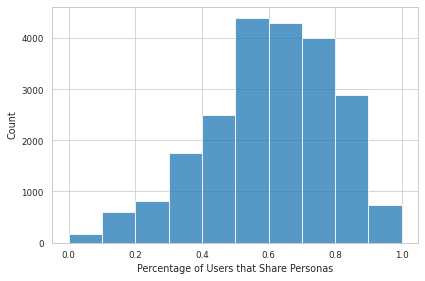

In [20]:
sns.set_context("paper")
sns.set_style("whitegrid")

ax = sns.histplot(x="per_users_shared_persona", data=res2, bins=10, cumulative=False)
ax.set(xlabel="Percentage of Users that Share Personas")
#ax.set(ylabel="Probality of Same Cohort ID")
#ax.legend(title='Starting domains')
plt.tight_layout()

<AxesSubplot:xlabel='Proportion', ylabel='per_users_shared_persona'>

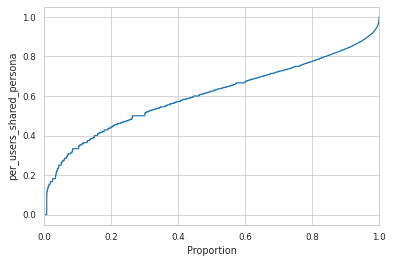

In [25]:
sns.ecdfplot(
data=res2, y="per_users_shared_persona", stat='proportion', complementary=False)

In [27]:
sns.cedfplot(data=res2, y="per_users_shared_persona", stat='proportion', complementary=True)

AttributeError: module 'seaborn' has no attribute 'cdfplot'

/global/home/hpc3552/.local/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='per_users_shared_persona', ylabel='Density'>

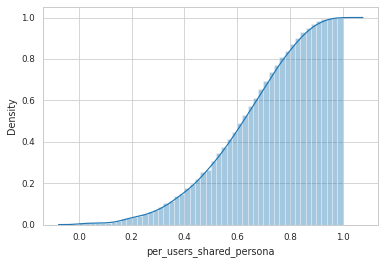

In [29]:
import numpy as np
import seaborn as sns

x = np.random.randn(200)
kwargs = {'cumulative': True}
sns.distplot(res2['per_users_shared_persona'], hist_kws=kwargs, kde_kws=kwargs)